 Details of the dataset

The dataset contains 6 predictors related to eating habits, 5 predictors related to responders’ characteristics, and 5 predictors related to physical conditions. The output is a categorical variable in 7 levels: Insufficient Weight, Normal Weight,Overweight Level I,Overweight Level II,Obesity TypeI,Obesity TypeII and Obesity TypeIII

# Problem Statement

Obesity is a chronic disease that is common and serious and linked to an increased risk of chronic diseases such as type 2 diabetes, heart disease, and some forms of cancer. It is, however, strongly related to a variety of risk factors that are challenging to identify. In this regard, analyzing and studying to identify these risk factors has the potential to provide greater insight into their relationships with health outcomes. The purpose of this project was to apply different predictive models based on health factors to predict the level of obesity.

Problematic
Based on all the data, the objective of this project is to classify individuals according to their obesity level. This variables will be named: NObeyesdad. This variable will take differents values among:

Insufficient_Weight
Normal_Weight
Overweight_Level_I
Overweight_Level_II
Obesity_Type_I
Obesity_Type_II
Obesity_Type_III

In [24]:
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv("C://Users//Karishma P//OneDrive//Desktop//obesity data.csv",encoding_errors='ignore')
df.head()
df.tail() 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [26]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [27]:
print(df.isna().sum()) #for missing values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [28]:
df_clean = df.dropna()
print(df_clean.shape, df.shape)

(2111, 17) (2111, 17)


# Feature Scaling

In [29]:
num_cols=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[num_cols]=ss.fit_transform(df[num_cols])

In [30]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,-0.522124,-0.875589,-0.862558,yes,no,-0.785019,0.404153,Sometimes,no,-0.013073,no,-1.188039,0.561997,no,Public_Transportation,Normal_Weight
1,Female,-0.522124,-1.947599,-1.168077,yes,no,1.088342,0.404153,Sometimes,yes,1.618759,yes,2.339750,-1.080625,Sometimes,Public_Transportation,Normal_Weight
2,Male,-0.206889,1.054029,-0.366090,yes,no,-0.785019,0.404153,Sometimes,no,-0.013073,no,1.163820,0.561997,Frequently,Public_Transportation,Normal_Weight
3,Male,0.423582,1.054029,0.015808,no,no,1.088342,0.404153,Sometimes,no,-0.013073,no,1.163820,-1.080625,Frequently,Walking,Overweight_Level_I
4,Male,-0.364507,0.839627,0.122740,no,no,-0.785019,-2.167023,Sometimes,no,-0.013073,no,-1.188039,-1.080625,Sometimes,Public_Transportation,Overweight_Level_II


# ENCODING

In [31]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS', 'NObeyesdad']

df[categorical_columns] =df[categorical_columns].astype('category')

for i in categorical_columns:
    df[i]=le.fit_transform(df[i])


In [33]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,3,3,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,1,3,1
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,1,4,5
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,3,6


# K-means

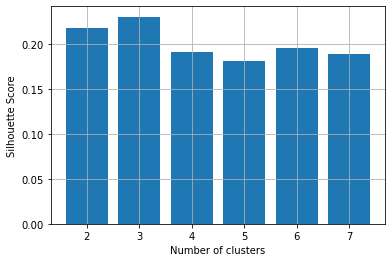

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2,8):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 


In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3) #highest silhoutte score is on cluster3
clusters = kmeans.fit_predict(df)


In [36]:
clusters

array([1, 1, 1, ..., 2, 2, 2])

In [37]:
df["Cluster"] = clusters
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cluster
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,3,3,1,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,3,1,1
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,1,3,1,1
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,1,4,5,2
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,3,6,2


# Calculating K mean performance using silhouette score and Intertia

In [38]:
silhouette_avg = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2553628942723935


A Silhouette Score of 0.255 indicates a moderate level of separation between clusters. The score ranges from -1 to 1, where higher values suggest better-defined clusters. A score of 0.255 suggests that the clusters have some degree of separation, but there is room for improvement. 

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 18287.925947506228


The inertia value of 18287.93 represents the sum of squared distances between data points and the assigned cluster centroids in a KMeans clustering algorithm. A lower inertia generally indicates more compact.

# Plotting the Clustering on basis of Age and Weight

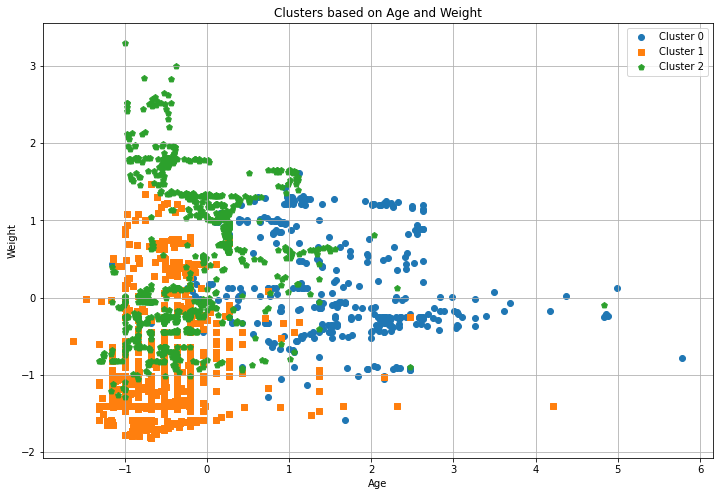

In [41]:
import matplotlib.pyplot as plt
import pandas as pd


# Extracting relevant columns for clustering
features = df[['Age', 'Height', 'Weight', 'family_history_with_overweight',
               'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
               'CALC', 'MTRANS', 'NObeyesdad','Cluster']]


# Create separate DataFrames for each cluster
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

# Plotting the clusters
plt.figure(figsize=(12, 8))

# Scatter plot for Cluster 0
plt.scatter(cluster_0['Age'], cluster_0['Weight'], label='Cluster 0', marker='o')

# Scatter plot for Cluster 1
plt.scatter(cluster_1['Age'], cluster_1['Weight'], label='Cluster 1', marker='s')

# Scatter plot for Cluster 2
plt.scatter(cluster_2['Age'], cluster_2['Weight'], label='Cluster 2', marker='p')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Clusters based on Age and Weight')
plt.legend()
plt.grid(True)
plt.show()


Cluster 0: This cluster is located in the middle of the chart and consists of people who are middle-aged and have a moderate weight. This could be a group of adults who are at a healthy weight or who are overweight but not obese.



Cluster 1: This cluster is located in the lower left corner of the chart and consists of people who are younger and have a lower weight. This could be a group of children or young adults who are at a healthy weight.



Cluster 2: This cluster is located in the upper right corner of the chart and consists of people who are older and have a higher weight. This could be a group of adults who are obese.

# Recommendations

Cluster 0 (Younger, healthy weight):

Maintain healthy habits: Encourage continued healthy eating and regular physical activity to develop lifelong positive behaviors.
Monitor growth and development: Regular checkups with a healthcare professional to ensure proper growth and development, addressing any potential issues early on.


Cluster 1 (Middle-aged, moderate weight):

Focus on prevention: Implement strategies to prevent weight gain and potential future health risks associated with overweight. This might include:
Healthy diet: Increase intake of fruits, vegetables, and whole grains while reducing processed foods and sugary drinks.
Regular physical activity: Aim for at least 150 minutes of moderate-intensity exercise per week.
Stress management: Find healthy ways to manage stress, as it can contribute to weight gain and unhealthy eating habits.

Cluster 2 (Older, higher weight):

Weight management: Address excess weight through a personalized plan involving dietary changes, increased physical activity, and potentially, behavioral therapy. Consult with a healthcare professional for guidance and supervision.
Comorbidity management: If present, manage any chronic health conditions associated with obesity (e.g., diabetes, heart disease) to improve overall health and well-being.
Physical activity modifications: Adjust physical activity routine based on individual capabilities and limitations. Focus on low-impact exercises and gradually increase intensity as tolerated.

# Plotting the Clustering on basis of Age and NObeyesdad

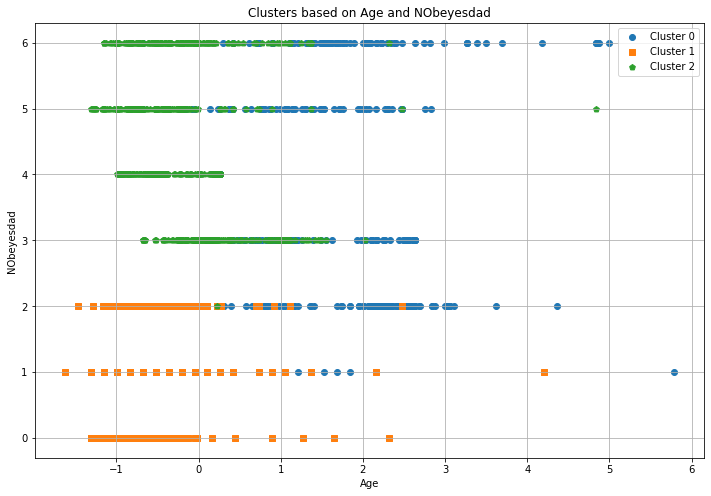

In [44]:
import matplotlib.pyplot as plt
import pandas as pd


# Extracting relevant columns for clustering
features = df[['Age', 'Height', 'Weight', 'family_history_with_overweight',
               'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
               'CALC', 'MTRANS','NObeyesdad' ,'Cluster']]


# Create separate DataFrames for each cluster
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

# Plotting the clusters
plt.figure(figsize=(12, 8))

# Scatter plot for Cluster 0
plt.scatter(cluster_0['Age'], cluster_0['NObeyesdad'], label='Cluster 0', marker='o')

# Scatter plot for Cluster 1
plt.scatter(cluster_1['Age'], cluster_1['NObeyesdad'], label='Cluster 1', marker='s')

# Scatter plot for Cluster 2
plt.scatter(cluster_2['Age'], cluster_2['NObeyesdad'], label='Cluster 2', marker='p')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('NObeyesdad')
plt.title('Clusters based on Age and NObeyesdad')
plt.legend()
plt.grid(True)
plt.show()


Interpretations-

Cluster 0:

Age range: Likely younger individuals, potentially children, adolescents, or young adults.
NObesity levels: Likely Insufficient_Weight, Normal_Weight, or potentially Overweight_Level_I.
Potential implications:
Focus on maintaining healthy weight trajectories.
Address any growth or nutritional concerns early.
Instill positive lifelong habits around diet and exercise.


Cluster 1:

Age range: Likely middle-aged adults.
NObesity levels: Likely Normal_Weight, Overweight_Level_I, or Overweight_Level_II.
Potential implications:
Emphasize prevention strategies to avoid weight gain and associated health risks.
Promote healthy eating habits, regular physical activity, and stress management.


Cluster 2:

Age range: Likely older adults.
NObesity levels: Likely Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, or Obesity_Type_III.
Potential implications:
Prioritize comprehensive weight management plans, including dietary changes, increased physical activity, and behavioral support.
Manage any existing obesity-related comorbidities.
Tailor physical activity recommendations to individual capabilities.




# RECOMMENDATIONS





Cluster 0:
Promote healthy growth and development.
Encourage healthy eating and physical activity habits.
Monitor weight trajectories and address concerns early.

Cluster 1:
Focus on prevention strategies to maintain healthy weight.
Educate about healthy eating, portion control, and physical activity recommendations.
Address stress management and other lifestyle factors that contribute to weight gain.

Cluster 2:
Develop personalized weight management plans.
Provide support and guidance for dietary changes and increased physical activity.
Address obesity-related comorbidities and adjust physical activity recommendations as needed.
Consider behavioral therapy or support groups for adherence and motivation